## Introduction of both problems:

1. Monty Hall problem 

"Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?" Parade magazine in 1990

2. Monty Fall variant

"The host does not know what lies behind the doors, and opens one at random that happens not to reveal the car"


Source: https://en.wikipedia.org/wiki/Monty_Hall_problem

### 1. Monty Hall problem in theory

At the beginning, giving initial settings for this problem we have 1/3 chance of selecting a Car.

$$ P(C_{1}) = 1/3, P(C_{2}) = 1/3, P(C_{3}) = 1/3 $$ 
where $C_{i}$  - event that the Car is in $ i $

For the Monty Hall Problem, note that it shouldn’t matter which door is selected initially because the three door should be identical and all three doors have a 1/3 chance of containing the prize. Lets say the contestant chooses the 1st door.

| Prize is at | Player's initil choice | Monty elimination | Player's final choice | Result |
| --- | --- | --- | --- | --- | 
| 1 | 1 | 2 or 3 | 3 or 2 | LOSE  |
| 2 | 1 | 3 | 2 |  WIN |
| 3 | 1 | 2 | 3 |  WIN |

In case contestant chooses the 1st door, now what is the probability that the host will open Door 3, given that the prize is behind either door 1,2 or 3.

$$ P(O_{3}|C_{1}) = 1/2, P(O_{3}|C_{2}) = 1 , P(O_{3}|C_{3}) = 0 $$
where $O_{i}$  - event that the host opens door $i$

Now that we have understood the reasoning, lets check the optimal strategy. Suppose that in this example the host opens door 3. Door 3 doesn’t have the prize, now how sure can we be that door 2 has the prize?

To calculate conditional probabilities Bayesian Rule is used. Bayesian Theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

$$ P(A_{i}|B) = \frac{P(B|A_{i})P(A_{i})}{P(B)} = \frac{P(B|A_{i})P(A_{i})}{\sum \limits_{j}^{} P(B|A_{j})P(A_{j})} $$

P(A|B) — is the probability of A given that B has already happened.
P(B|A) — is the probability of B given that A has already happened. 
P(A) — is the unconditional probability of A occurring.
P(B) — is the unconditional probability of B occurring.


$$ P(C_{2}|O_{3}) = \frac{P(O_{3}|C_{2})P(C_{2})}{P(O_{3}|C_{1})P(C_{1}) + P(O_{3}|C_{2})P(C_{2}) + P(O_{3}|C_{3})P(C_{3}) } =   \frac{(1)(\frac{1}{3})}{(\frac{1}{2})(\frac{1}{3}) + (1)(\frac{1}{3}) + (0)(\frac{1}{3}) } = \frac{2}{3} $$

If the contestant would remain with door 1 in this scenario:

$$ P(C_{1}|O_{3}) = \frac{P(O_{3}|C_{1})P(C_{1})}{P(O_{3}|C_{1})P(C_{1}) + P(O_{3}|C_{2})P(C_{2}) + P(O_{3}|C_{3})P(C_{3}) } =   \frac{(\frac{1}{2})(\frac{1}{3})}{(\frac{1}{2})(\frac{1}{3}) + (1)(\frac{1}{3}) + (0)(\frac{1}{3}) } = \frac{1}{3} $$

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from time import time
import random
import pandas as pd

def run_simulations(max_simulation_number=2000, variant='Monty Hall', change=True, keep_log=False, fname='simulation.png' ):
    """Function runs number of simulation for different variants of Monty Hall problem to evaluate what is the optimal strategy
        for the Contenstant. It runs 'simulation_number' of simulation where for each of them different number of simulated games
        is conducted. Thanks to that we can see how probability value for specific variant and strategy converge to a specific value. 
        
    Parameters:
    - max_simulation_number (int): Maximum number of simulation with increasing number of iterations
    - variant (str): What variant of the problem to simulate: 'Monty Hall', 'Monty Fall'
    - change (bool): Player's strategy to tackle the problem: True - Chnage, False - Stay
    - keep_log (bool): if to create simulation log, not recommended for huge number of simulations
    
    Returns:
    list: mean probabilities for number of simulation. 
    Data Frame: simulation_log

   """

    columns =  ['simulation_id','game_no','prize_door','players_initial_choice','monty_elimination','players_final_choice','result'] 
    simulation_log = []
    
    # results of simulations
    winning_probability_means = []
    # ids of simulation
    simulation_ids = []
    # to calculate simulation time
    start_time = time()

    # double loop construction let us to see how the probabilities are converging at a specific value for seperate experiments
    for no_of_games in range(1, max_simulation_number+1):
        
        score = []
        door_set = {1,2,3} 
        for game_no in range(0,no_of_games): # sub loop that simulates from 1 to no_of_games games
            game_log = []
            game_log.append(no_of_games)
            game_log.append(game_no)
            
            # 0. initial settings:
            not_to_open_doors = set()
            host_doors = door_set.copy()
            player_doors = door_set.copy()
            
            # 1. Randomly choose prize door
            prize_door = random.choice(tuple(host_doors))
            game_log.append(prize_door)
            if variant == 'Monty Hall':
                not_to_open_doors.add(prize_door) # Host knows not to open prize door 
            #elif variant == 'Monty Fall':
                # do nothing as Host does not know where is the prize
                
            # 2. Randomly choose Contestant selection
            players_choice = random.choice(tuple(player_doors))
            game_log.append(players_choice)
            # Host knows not to open these doors 
            not_to_open_doors.add(players_choice) 
            host_doors.difference_update(not_to_open_doors)
        
            # 3. if host has a choice, pick one at random and remove from available choice for the Contestant
            host_elimination = random.choice(tuple(host_doors))
            game_log.append(host_elimination)
            # Contestant cannot pick open door
            player_doors.remove(host_elimination)
                # if Host has chosen prize door - trial void
            if host_elimination == prize_door:
                # Contestant does not get to choose
                game_log.append('--')
                # trial considered as VOID
                game_log.append('VOID')
                # update simulation log
                if keep_log:
                    simulation_log.append(game_log)
                # skip to another game iteration
                continue
            
            # 4. Depending on the strategy Contestant may keep or change initial selection !!!! implement different solution
            if change:
                # remove players previous choice
                player_doors.remove(players_choice)
                #unpack player's final selection
                (final_choice,) = player_doors 
            else:
                # player keeps initial choice
                final_choice = players_choice
                
            game_log.append(final_choice)
        

            if final_choice == prize_door:
                score.append(1)
                game_log.append('WIN')
            else:
                score.append(0)
                game_log.append('LOSE')

            if keep_log:
                simulation_log.append(game_log)
  
        if len(score)==0:
            score.append(0)
        winning_probability_means.append(np.mean(score))
        simulation_ids.append(no_of_games)
            
    end_time = time()
    print ("Total time :", end_time - start_time )
    
    # plotting a figure  
    plt.figure()
    
    #Set a title
    if change:
        strategy = 'switching'
    else:
        strategy = 'keeping'
        
    label = 'Probability convergence graph for {} problem\n with {} initial choice strategy'.format(variant,strategy)
    plt.title(label)
    plt.xlabel('number of independant simulations with increasing number of trials')
    plt.ylabel('probability of winning a prize')
    # Display results of symulation
    plt.plot(simulation_ids,winning_probability_means)
    plt.show()
    #plt.savefig(fname, dpi=400)
    
    print('Show probabilities of 10 latest simulation:')
    print(winning_probability_means[-10:])
    
    if keep_log:
        simulation_log = pd.DataFrame(data=simulation_log, columns=columns)
        
    return winning_probability_means , simulation_log


### 2. Monty Hall problem - simulation of the optimal strategy

Total time : 14.018676280975342


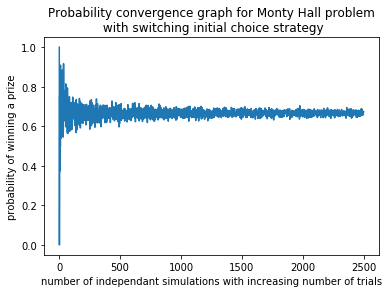

Show probabilities of 10 latest simulation:
[0.6659975913287837, 0.6573033707865169, 0.6662655435218612, 0.6583801122694467, 0.6753507014028056, 0.6598557692307693, 0.6651982378854625, 0.6681345076060848, 0.6722689075630253, 0.674]


In [3]:
probabilities, simulation_log = run_simulations(max_simulation_number=2500, variant='Monty Hall', change=True, keep_log=True )

In [4]:
print('Snipped from simulation log:')
simulation_log[:10]

Snipped from simulation log:


,simulation_id,game_no,prize_door,players_initial_choice,monty_elimination,players_final_choice,result
0,1,0,3,2,1,3,WIN
1,2,0,2,2,3,1,LOSE
2,2,1,1,1,3,2,LOSE
3,3,0,3,3,2,1,LOSE
4,3,1,3,1,2,3,WIN
5,3,2,3,3,2,1,LOSE
6,4,0,3,2,1,3,WIN
7,4,1,1,1,2,3,LOSE
8,4,2,3,2,1,3,WIN
9,4,3,1,3,2,1,WIN


In [5]:
print('Random sample from simulation log:') 
simulation_log.sample(n = 5)

Random sample from simulation log:


,simulation_id,game_no,prize_door,players_initial_choice,monty_elimination,players_final_choice,result
2262573,2127,1572,3,2,1,3,WIN
1422296,1687,155,2,1,3,2,WIN
2973072,2438,2369,3,3,2,1,LOSE
1124651,1500,401,2,1,3,2,WIN
2542984,2255,1599,1,3,2,1,WIN


### 3. Monty Hall problem - What if Contestant keeps original choice?

Total time : 13.582834720611572


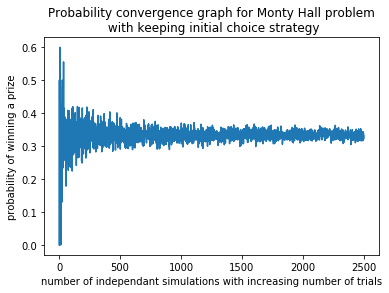

Show probabilities of 10 latest simulation:
[0.32798073063026895, 0.33587479935794545, 0.3369434416365824, 0.33039294306335204, 0.3374749498997996, 0.343349358974359, 0.31678013616339606, 0.3390712570056045, 0.321328531412565, 0.3312]


In [7]:
probabilities, simulation_logs = run_simulations(max_simulation_number=2500, variant='Monty Hall', change=False, keep_log=False )

Then the winning probability converges to around 0.33

### 4. 'Monty Fall' variant in theory

To meet assumptions of the Monty Fall variant we have to exclude all trials where Monty opens the door with a car.
In total there will be 2/3 * 1/2 = 1/3 cases to skip.

To observe this happending Contestant has to select a goat in the first place (in the previous variant this would assure victory) and then Monty has 50% chance to select a goat. There are 1/3 cases where Monty loses his job by selecting a car. 1/3 when he choses a goat and then the player with switching tactics wins and 1/3 of cases when Contestant switches and chooses a goat. Therefore for the second case, there is no better technique and keeping original choice or switching gives the same values. We can observe it in the following table:

| Prize is at | Player's initil choice | Monty elimination | Player's final choice | Result |
| --- | --- | --- | --- | --- | 
| 1 | 1 | 2 | 3 | LOSE |
| 1 | 1 | 3 | 2 | LOSE |
| 2 | 1 | 2 | - | VOID |
| 2 | 1 | 3 | 2 | WIN  |
| 3 | 1 | 2 | 3 | WIN  |
| 3 | 1 | 3 | - | VOID |


### 5. 'Monty Fall' variant - simulation of both strategies

Total time : 14.63212776184082


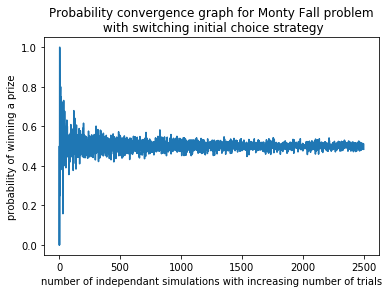

Show probabilities of 10 latest simulation:
[0.5123867069486405, 0.48747016706443913, 0.494026284348865, 0.49470588235294116, 0.5081967213114754, 0.4878482513337285, 0.48329355608591884, 0.5125076266015863, 0.509242695289207, 0.4837920489296636]


In [8]:
# strategy: changing the initial selection
probabilities, simulation_log = run_simulations(max_simulation_number=2500, variant='Monty Fall', change=True, keep_log=True )

Total time : 15.634198904037476


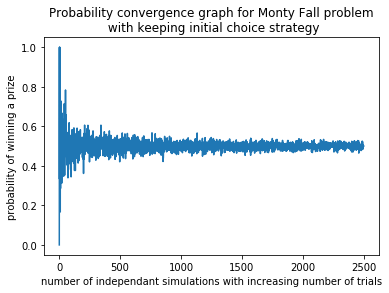

Show probabilities of 10 latest simulation:
[0.5227272727272727, 0.5076832151300237, 0.49188214070956104, 0.48446833930704897, 0.4991076740035693, 0.5069823922282939, 0.5027322404371585, 0.5012562814070352, 0.49734513274336284, 0.5]


In [9]:
# strategy: keeping the initial selection
probabilities, simulation_log = run_simulations(max_simulation_number=2500, variant='Monty Fall', change=False, keep_log=True)

As we can see from the simulations, both winning probabilities converge to 50 %, which confirms the hypothesis.

In [10]:
# Check simulation log
print('Snipped from simulation log:')
simulation_log[:10]

Snipped from simulation log:


,simulation_id,game_no,prize_door,players_initial_choice,monty_elimination,players_final_choice,result
0,1,0,1,2,1,--,VOID
1,2,0,1,2,1,--,VOID
2,2,1,2,2,1,2,WIN
3,3,0,2,1,3,1,LOSE
4,3,1,1,1,3,1,WIN
5,3,2,2,3,1,3,LOSE
6,4,0,3,2,3,--,VOID
7,4,1,3,3,1,3,WIN
8,4,2,1,1,3,1,WIN
9,4,3,2,1,2,--,VOID


In [11]:
# sample from simulation log
print('Random sample from simulation log:') 
simulation_log.sample(n = 5)

Random sample from simulation log:


,simulation_id,game_no,prize_door,players_initial_choice,monty_elimination,players_final_choice,result
310215,788,137,1,3,2,3,LOSE
1168397,1529,241,3,1,2,1,LOSE
2490088,2232,292,3,2,1,2,LOSE
1793898,1894,1227,2,3,2,--,VOID
1561734,1767,1473,2,1,3,1,LOSE


In this Notebook a generic function to simulate different Monty Hall variants was presented. 
It is programmed in a way that is easy to extend it by implementing other viariants of the problem.